<a href="https://colab.research.google.com/github/cybertronicEX/LAB2/blob/main/MLP_with_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.regularizers import l1, l2
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [1 7 6 2 1 6 6 2 1 8]


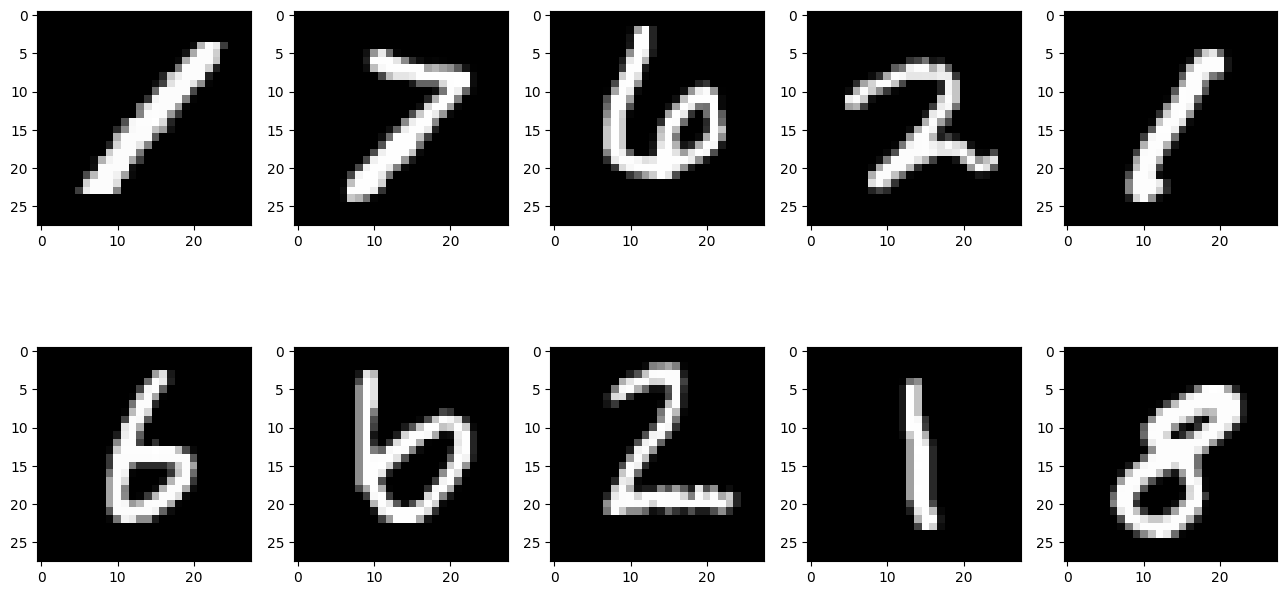

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [18]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(128,activation='relu'))
model.add(Dense(128,input_dim=64,activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(64,input_dim=64,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


Train the model

In [20]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 1.2544 - accuracy: 0.8861
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4253 - accuracy: 0.9337
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3464 - accuracy: 0.9444
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3071 - accuracy: 0.9513
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2826 - accuracy: 0.9557
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2628 - accuracy: 0.9592
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2480 - accuracy: 0.9611
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2353 - accuracy: 0.9644
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2248 - accuracy: 0.9647
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - loss

Plot the loss and accuracy graphs

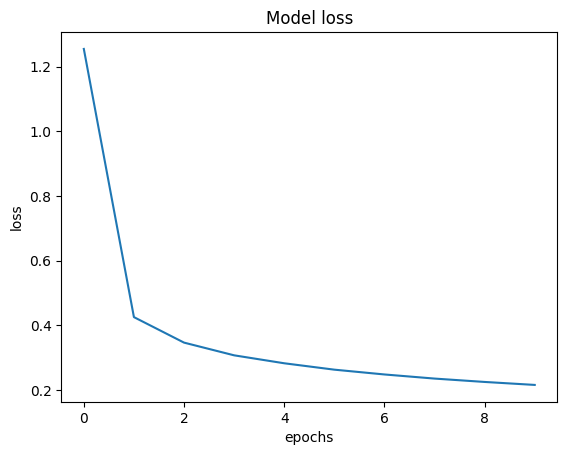

In [27]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

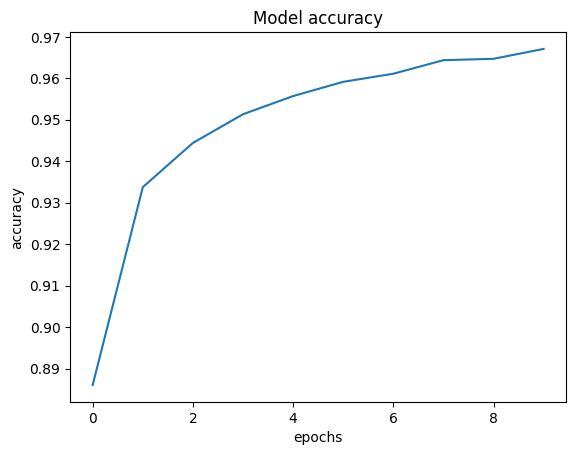

In [26]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [25]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2307 - accuracy: 0.9622
Loss of the Test dataset is: 0.23067651689052582
Accuracy of the test dataset is: 0.9621999859809875


Save the model weights

In [24]:
model.save_weights('MNIST_WEIGHTS_V1.h5')

313/313 [==============================] - 1s 2ms/step - loss: 0.2307 - accuracy: 0.9622
Loss of the Test dataset is: 0.23067651689052582
Accuracy of the test dataset is: 0.9621999859809875
313/313 [==============================] - 1s 2ms/step


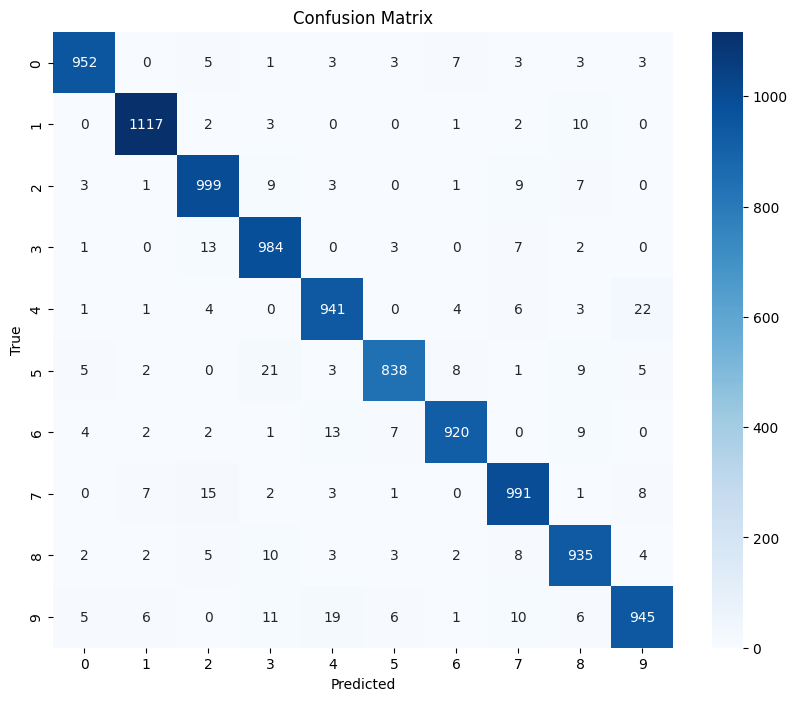

In [23]:

from sklearn.metrics import confusion_matrix

import seaborn as sns


loss, acc = model.evaluate(new_test_data, new_test_target)

print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')


predictions = model.predict(new_test_data)

predicted_classes = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(test_target, predicted_classes)



plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted')

plt.ylabel('True')

plt.title('Confusion Matrix')

plt.show()